# Group F

Groupmembers are:


|Gender|Firstname|Surname|Email| Study program| Semester| Student ID|
|:----:|:--------|:------|:----|:----------|:------------|:--------|
| f | Larissa | Jesus | student@student.uni-siegen.de| HCI| 4|1234|
| f |Cam Van|Tran Thi	|student@student.uni-siegen.de|HCI|4|1234|
| m |Roberto|Surname|student@student.uni-siegen.de|HCI|1|1234|

    
**Course**: First steps into Artificial Intelligence: Organization & Introduction

**Examiner**: Prof. Dr. Thomas Ludwig

**Semester**: Summersemester 2022

**Submission date**: 31. July 2022

**City**: Siegen, Germany

## Imports
Following imports and addtional installations are needed:

In [14]:
#Importing the necessary libraries for the data mining process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
#Importing the dataset
datapath = "data/diamonds_FSAI_SoSe22.csv"
raw_df = pd.read_csv(datapath, index_col = 0)

## Data Understanding

Explanation of the dataset columns:

carat: Carat weight of the diamond

cut: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very 
Good, Premium, Ideal

color: Color of the diamond, with D being the best and J the worst
clarity = How obvious inclusions are within the diamond: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, 
VVS1, IF (best))
    
depth depth %: The height of a diamond, measured from the culet to the table, divided by 
its average girdle diameter

table table%: The width of the diamond's table expressed as a percentage of its average 
diameter

price: the price of the diamond in US dollars

x: length mm

y: width mm

z: depth m

In [16]:
#Checking the shape of the dataset
raw_df.shape

(45849, 10)

In [17]:
#Checking descriptive statistics for the numerical features
raw_df.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [18]:
#Checking datatypes and if the total of non-null values match the number of rows of the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 45848
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45849 non-null  float64
 1   cut      45849 non-null  object 
 2   color    45849 non-null  object 
 3   clarity  45849 non-null  object 
 4   depth    45849 non-null  float64
 5   table    45849 non-null  float64
 6   price    45849 non-null  int64  
 7   x        45849 non-null  float64
 8   y        45849 non-null  float64
 9   z        45849 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


<AxesSubplot:title={'center':'Diamond price distribution'}, ylabel='Frequency'>

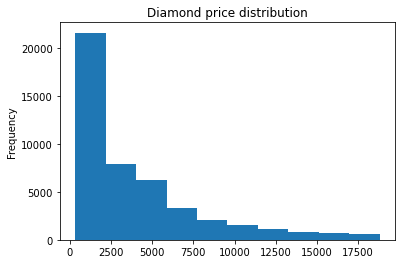

In [19]:
#Checking the price distribution
raw_df.price.plot.hist(title="Diamond price distribution")

<AxesSubplot:title={'center':'Cut frequency'}>

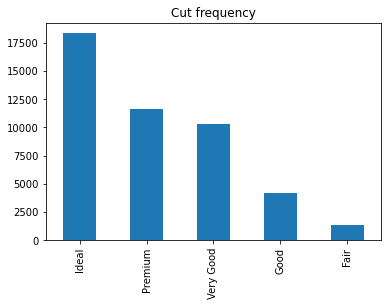

In [20]:
#Checking the cut frequency
raw_df['cut'].value_counts().plot.bar(title="Cut frequency")

In [21]:
#Checking the linear correlation between the numerical variables
raw_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.029678,0.183533,0.921622,0.974599,0.947498,0.951264
depth,0.029678,1.000000,-0.292780,-0.009248,-0.024105,-0.028240,0.095962
table,0.183533,-0.292780,1.000000,0.129142,0.196954,0.184378,0.152333
price,0.921622,-0.009248,0.129142,1.000000,0.883858,0.861375,0.859190
x,0.974599,-0.024105,0.196954,0.883858,1.000000,0.970690,0.968763
y,0.947498,-0.028240,0.184378,0.861375,0.970690,1.000000,0.946979
z,0.951264,0.095962,0.152333,0.859190,0.968763,0.946979,1.000000


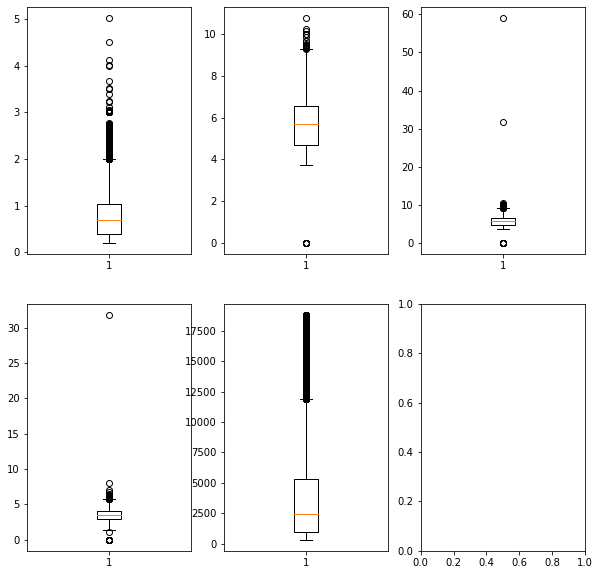

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
ax[0,0].boxplot(raw_df['carat'])
ax[0,1].boxplot(raw_df['x'])
ax[0,2].boxplot(raw_df['y'])
ax[1,0].boxplot(raw_df['z'])
ax[1,1].boxplot(raw_df['price'])
plt.show()

<AxesSubplot:xlabel='carat', ylabel='price'>

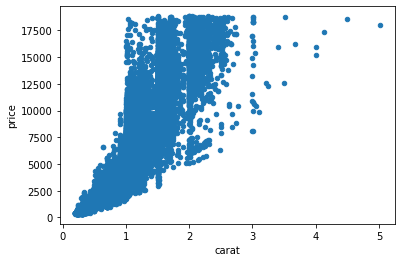

In [23]:
raw_df.plot(kind="scatter",x="carat", y="price")

## Data preparation

In [24]:
#Creating the dataset for the regression problem
df_reg = raw_df.copy()

In [25]:
#Transforming categorical data in numerical data in the regression dataset
enc = OrdinalEncoder()
df_reg[["cut","color", "clarity"]] = enc.fit_transform(df[["cut","color", "clarity"]])


In [26]:
#Defining our independent and dependent variables for the regression problem
independent_reg = df_reg.drop("price", axis=1)
dependent_reg = df_reg['price']

In [27]:
#Spliting the data in training and test set for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(independent_reg, dependent_reg, test_size=0.2, 
                                                                    random_state=42)
#Spliting the test set in test and validation for regression
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.125, random_state=42)

outliers_dec = IsolationForest(random_state=0).fit(df)
df['Isolation Forest'] = pd.Series(outliers_dec.predict(df))

df['Isolation Forest'].value_counts()

In [52]:
#Creating the dataset for the classification
df_clf = raw_df.copy()
df_clf = df_clf.drop(["carat","color","price","clarity"], axis=1)

In [53]:
df_clf.head()

,cut,depth,table,x,y,z
0,Premium,60.2,60.0,6.09,6.04,3.65
1,Premium,60.7,58.0,7.04,6.99,4.26
2,Premium,60.5,60.0,4.77,4.81,2.90
3,Good,63.1,57.0,4.28,4.31,2.71
4,Ideal,62.2,55.0,4.30,4.32,2.68


In [54]:
#Standardizing the classification dataset
df_clf[["depth", "table","y","x","z"]] = StandardScaler().fit_transform(df[["depth", "table","y","x","z"]])

In [55]:
#Defining our independent and dependent variables for the classification problem
independent_clf = df_clf.drop("cut", axis=1)
dependent_clf = df_clf['cut']

In [56]:
#Splitting the data in training and test set for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(independent_clf, dependent_clf, test_size=0.2, 
                                                                    random_state=42)
#Spliting the test set in test and validation for classification
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(X_train_clf, y_train_clf, test_size=0.125, random_state=42)


In [57]:
#Instanciating and fitting the regression model
Model_reg = RandomForestRegressor(random_state=43)
Model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = Model_reg.predict(X_test_reg)

In [58]:
#Instanciating and fitting the classification model
Model_clf = svm.SVC(random_state=42)
Model_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = Model_clf.predict(X_test_clf)

## Evaluation

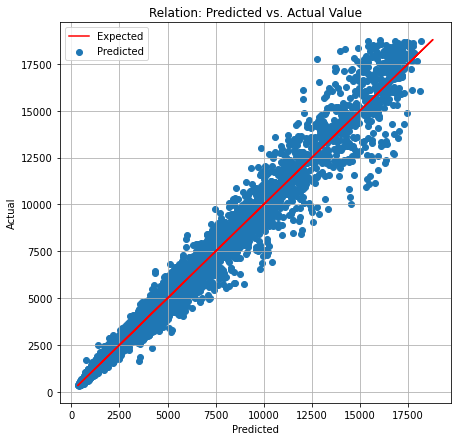

In [59]:
# Plotting the graph of the predicted  x actual actual values of the test set (Regression problem)
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(y_test_reg, y_test_reg, label="Expected", color = "red")
ax.scatter(y_pred_reg, y_test_reg, label = "Predicted")

ax.set(xlabel='Predicted', ylabel='Actual',
       title='Relation: Predicted vs. Actual Value')

ax.grid()
ax.legend()

plt.show()

In [60]:
# Calculation main regression evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_reg, y_pred_reg)
print("R2  : "+ str(r2))

MSE : 308141.6681783197
RMSE: 555.105096516254
MAE : 281.9844396154645
R2  : 0.9811548511960195


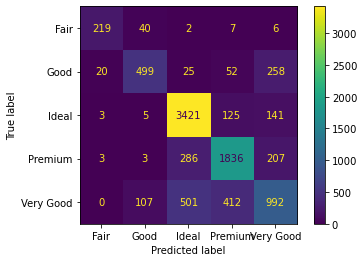

In [61]:
#Ploting a confusion matrix for the test set of the classification model
ConfusionMatrixDisplay.from_estimator(Model_clf, X_test_clf, y_test_clf)

# plt.grid(visible=None)
plt.show()

In [62]:
#Printing the classification score of the training and the test set
print (f"Score of the training set: {Model_clf.score(X_train_clf, y_train_clf)}")
print (f"Score of the test set: {Model_clf.score(X_test_clf, y_test_clf)}")

Score of the training set: 0.7572755032093226
Score of the test set: 0.7597600872410033
